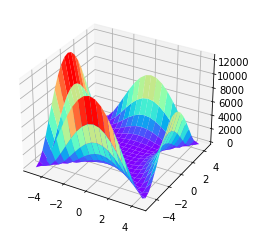

[-3.3882267456937267, -5.210492629435057, 6.03334189796792, -14.644777899276246, -2.7820343158936547]
[-6.579084670613679, -5.547822583787548, 5.67010431990501, -6.742547018303124, 8.91985318099735]
[-13.86450385568898, -6.309116007298313, 19.768542673089637, -13.998795252015098, -2.6459393038901537]
[10.058067939363912, -6.007207766574285, 85.6983255440735, 13.386475545705798, -5.962936971311813]
[-5.436144146384985, -4.8420239324899494, 142.9799907566127, 19.540013868235707, -10.026464677030031]
[-7.814843932056523, -6.090673195825494, 24.313977899881127, 14.937313985767261, -5.909223931539121]
[-4.079428924207007, -9.816243912626927, -5.654148542542799, 2.3419554350521734, -3.707050924486361]
[-2.8925977954379953, -6.69395681815356, -3.2790516511361276, 0.6504019180061349, -1.6508216145674763]
[9.988299511103346, -5.900513070970203, -6.00784379273146, -14.277691833943381, -2.7577421649485774]
[-2.892691290771289, 0.4889075959538289, -3.110352295430507, -2.869083226861772, -2.7603193

In [13]:
import time
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def normalize (x):# 单位化向量
  norm=math.sqrt(sum(e**2 for e in x))
  return x / norm

def sign (a):# 符号函数
  if a>0 :
    return 1
  elif a<0:
    return -1
  else: 
    return 0

def f (input):# 测试函数（目标为求得函数最小值，此函数极值点为 0）
  x=input[0]
  y=input[1]
#  result =-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1)
  result=20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3
#  print(result)
  return result

# 展示测试函数3维曲面图
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据坐标
xx = np.arange(-5,5,0.5)    #起点-5，重点5，间隔0.5
yy = np.arange(-5,5,0.5)
#网格化处理
X, Y = np.meshgrid(xx, yy)

#作图
#lambda:输入x，y输出他们的值     map：使用 lambda 匿名函数
ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3,X,Y))) ,cmap='rainbow')
#ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1),X,Y))) ,cmap='rainbow')
plt.show()


time_start=time.time ()# 计时器

eta=0.95 #步长调整比例
iter=100 #迭代次数
step=1 #初始搜索步长
d0=5 #触须间距
k=2 #变量维数
xl=0 #左触须坐标
xr=0 #右触须坐标
t=5  #天牛个数

ss=[] #数组展示所有结果

#随机生成天牛质心坐标
x=np.random.rand(t,k)
#print(x)


for i in range (iter):#开始迭代
    s=[]
    for j in range(t):
        dir=np.random.rand(k)#随机单位向量（头朝向）
        dir=normalize(dir)#归一化
        xl=x[j]+d0*dir/2
        xr=x[j]-d0*dir/2
        fl=f(xl)
        fr=f(xr)
        x[j]=x[j]-step*dir*sign(fl-fr)#找最小值所以是减
        s.append(f(x[j]))
        ss.append(f(x[j]))
    print(s)
    step*=eta
    

ss.sort()
print('最小值=',ss[0])
time_end=time.time()
print('time cost',time_end-time_start,'s')


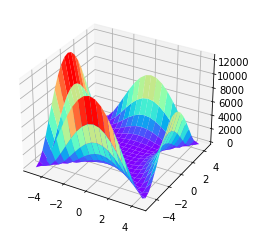

最小值= 0
time cost 0.012964487075805664 s


In [5]:
import time
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def normalize (x):# 单位化向量
  norm=math.sqrt(sum(e**2 for e in x))
  return x / norm

def sign (a):# 符号函数
  if a>0 :
    return 1
  elif a<0:
    return -1
  else: 
    return 0

def f (input):# 测试函数（目标为求得函数最小值，此函数极值点为 0）
  x=input[0]
  y=input[1]
  result =-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1)
#  result=20+x**2+y**2-10*(math.cos(2*math.pi*x)+math.cos(2*math.pi*y))
#  print(result)
  return result

# 展示测试函数3维曲面图
#fig = plt.figure()  #定义新的三维坐标轴
#ax3 = plt.axes(projection='3d')

#定义三维数据坐标
xx = np.arange(-5,5,0.5)    #起点-5，重点5，间隔0.5
yy = np.arange(-5,5,0.5)
#网格化处理
X, Y = np.meshgrid(xx, yy)

#作图
#lambda:输入x，y输出他们的值     map：使用 lambda 匿名函数
#ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3,X,Y))) ,cmap='rainbow')
#ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1),X,Y))) ,cmap='rainbow')
#plt.show()


time_start=time.time ()# 计时器

eta=0.95 #步长调整比例
iter=50 #迭代次数
step=1 #初始搜索步长
d0=5 #触须间距
k=2 #变量维数
xl=0 #左触须坐标
xr=0 #右触须坐标
t=5  #天牛个数


allmin=0 #记录全部的最小值

ss=[] #数组展示所有结果

#随机生成天牛质心坐标
x=np.random.rand(t,k)
#print(x)


for i in range (iter):#开始迭代
    s=[]
    smin=0  #记录一次迭代中的最小值
    for j in range(t):
        dir=np.random.rand(k)#随机单位向量（头朝向）
        dir=normalize(dir)#归一化
        xl=x[j]+d0*dir/2
        xr=x[j]-d0*dir/2
        fl=f(xl)
        fr=f(xr)
        x[j]=x[j]-step*dir*sign(fl-fr)#找最小值所以是减
        s.append(f(x[j]))
        if f(x[j]) < smin:
            smin=f(x[j])
#    print(s)
#    print(smin,'\n')
    if smin<  allmin:
        allmin=smin
    step*=eta
    

print('最小值=',allmin)
time_end=time.time()
print('time cost',time_end-time_start,'s')
